## Feature based classification

### jey@aims.ac.za

# Module importation

In [ ]:
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.datasets import mnist
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


1.15.0


## Load the dataset

In [ ]:
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1XpIaZzSMfyTUH-KFxpXFDsL1PZO_mrC0', header=None,
                      names = ['region-centroid-col', 'region-centroid-row', 'region-pixel-count', 'short-line-density-5', 
                               'short-line-density-2', 'vedge-mean', 'vegde-sd', 'hedge-mean', 'hedge-sd', 
                               'intensity-mean', 'rawred-mean', 'rawblue-mean', 'rawgreen-mean', 'exred-mean', 
                               'exblue-mean', 'exgreen-mean', 'value-mean', 'saturatoin-mean', 'hue-mean', 'target'],delim_whitespace=True)

## 1. Read dataset

In [ ]:
dataset.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturatoin-mean,hue-mean,target
0,218.0,178.0,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.77778,-25.222221,75.222220,0.318996,-2.040554,6
1,113.0,130.0,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.00000,-2.333333,2.555556,1.000000,-2.123254,3
2,202.0,41.0,9,0.000000,0.0,0.944448,0.772202,1.111112,1.025597,123.037040,111.888885,139.777790,117.444440,-33.444443,50.22222,-16.777779,139.777790,0.199347,-2.299918,2
3,32.0,173.0,9,0.000000,0.0,1.722222,1.781593,9.000000,6.749488,43.592594,39.555557,52.888890,38.333336,-12.111111,27.88889,-15.777778,52.888890,0.266914,-1.998858,6
4,61.0,197.0,9,0.000000,0.0,1.444444,1.515353,2.611111,1.925463,49.592594,44.222220,61.555557,43.000000,-16.111110,35.88889,-19.777779,61.555557,0.302925,-2.022274,6


# 2. Split the data into training, validation and testing

In [ ]:
dataset["target"]=dataset["target"]-1

In [ ]:
X = dataset.drop(columns=['target']).values
Y = dataset['target'].values

### Checking the shape

In [ ]:
X.shape

(2310, 19)

In [ ]:
Y.shape

(2310,)

### Splitting the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.3)

### Checking the splitting shape

In [ ]:
print (X_train.shape)
print (Y_train.shape)

(1131, 19)
(1131,)


In [ ]:
print(X_test.shape)
print (Y_test.shape)

(693, 19)
(693,)


In [ ]:
print(X_val.shape)
print (Y_val.shape)

(486, 19)
(486,)


### Find the unique numbers from the train labels


In [ ]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


### Convert from categorical labels to one-hot encoded vectors


In [ ]:
Y_train = np_utils.to_categorical(Y_train,7)

Y_val = np_utils.to_categorical(Y_val, 7)
Y_test = np_utils.to_categorical(Y_test, 7)

In [ ]:
Y_train[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_train[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_val[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
Y_test[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 4. Creation of NN model


### Network1

In [ ]:
def network1():
  
    model = Sequential()
    model.add(Dense(21, input_dim=19, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

**network1**: simple network with one layer, 19 inputs(19 features) and 21 filters between the inputs and the 7 outputs. the activation fuctions used is "**relu**" for the filters and "softmax" for the output.

  Validation performance on the training was :accuracy around 65% and 75%, the confusion *matrix*

### Network2

In [ ]:
def network2():
  
    model = Sequential()
    model.add(Dense(21, input_dim=19, activation='relu'))
    model.add(Dense(10, activation='relu'))

    model.add(Dense(7, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

**network2**: network with 2 layers, 19 inputs(19 features), 21 filters between layer 1 and layer 2 and 10 filters between layer 2 and the 7 outputs. the activation fuctions used are "relu" for the both layers and "softmax" for the output.

  Validation performance on training was :accuracy around 90% and the confusion *matrix* which has shown few prediction errors.

### Network3

In [ ]:
def network3():
  
    model = Sequential()
    model.add(Dense(21, input_dim=19, activation='relu'))
    model.add(Dense(10, activation='linear'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

**network3**: network with 3 layers, 19 inputs(19 features), 21 filters between layer 1 and layer 2, 10 filters between layer 2 and layer 2, 15 filters between layer2 and layer3 and the 7 outputs. the activation fuctions used are respectively "relu","lnear","relu" for layers and "softmax" for the output.

  Validation performance on the training was :accuracy around 80% and the confusion *matrix* which has shown more prediction errors comparative to the previous

## Choice of model

Based on the validation performance on the training and validation data! We decide to use the **network2** on the testing data.

## Testing data

In [ ]:
model = network2()

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 21)                420       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                220       
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 77        
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val) ,epochs = 100)

Train on 1131 samples, validate on 486 samples
Epoch 1/100
1131/1131 [==============================] - 1s 628us/step - loss: 8.0593 - acc: 0.1813 - val_loss: 5.2039 - val_acc: 0.3333
Epoch 2/100
1131/1131 [==============================] - 0s 69us/step - loss: 4.9404 - acc: 0.3457 - val_loss: 3.9157 - val_acc: 0.4506
Epoch 3/100
1131/1131 [==============================] - 0s 51us/step - loss: 3.5387 - acc: 0.4598 - val_loss: 2.4733 - val_acc: 0.4753
Epoch 4/100
1131/1131 [==============================] - 0s 47us/step - loss: 1.9625 - acc: 0.4598 - val_loss: 1.6282 - val_acc: 0.4609
Epoch 5/100
1131/1131 [==============================] - 0s 52us/step - loss: 1.4538 - acc: 0.5544 - val_loss: 1.1535 - val_acc: 0.6049
Epoch 6/100
1131/1131 [==============================] - 0s 58us/step - loss: 1.1729 - acc: 0.6083 - val_loss: 1.0271 - val_acc: 0.6317
Epoch 7/100
1131/1131 [==============================] - 0s 55us/step - loss: 1.0303 - acc: 0.6428 - val_loss: 0.9265 - val_acc: 0.6605


In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction

array([[1.0061443e-03, 2.0192775e-11, 4.8491216e-01, ..., 1.7399164e-01,
        5.2535376e-10, 9.3826662e-09],
       [9.5882267e-01, 1.0237470e-09, 3.7208906e-06, ..., 3.1379573e-02,
        1.8549887e-03, 2.5342119e-05],
       [6.6144744e-06, 3.3840422e-09, 1.0450917e-06, ..., 1.3307115e-03,
        9.8743314e-01, 1.5231285e-03],
       ...,
       [9.9985933e-01, 2.2983121e-11, 5.7288157e-11, ..., 1.5520289e-06,
        3.4878917e-06, 2.4739056e-12],
       [2.9282823e-05, 8.9202874e-04, 1.9462923e-10, ..., 1.2551819e-05,
        8.0066047e-07, 3.0035185e-15],
       [1.2237915e-20, 9.9430048e-01, 1.4552989e-17, ..., 9.1762216e-05,
        2.4053730e-19, 1.3028259e-24]], dtype=float32)

In [ ]:
prediction_classes = model.predict_classes(X_test)
prediction_classes_val = model.predict_classes(X_val)


In [ ]:
prediction_classes

array([2, 0, 5, 3, 3, 2, 4, 6, 5, 3, 1, 5, 1, 2, 5, 3, 4, 5, 5, 6, 5, 1,
       1, 5, 3, 0, 3, 5, 4, 6, 5, 3, 0, 2, 2, 6, 4, 6, 5, 0, 0, 5, 5, 3,
       3, 0, 6, 0, 2, 3, 5, 1, 5, 3, 2, 0, 0, 1, 1, 0, 0, 1, 0, 4, 2, 1,
       4, 1, 4, 1, 1, 3, 2, 2, 1, 4, 5, 5, 4, 3, 3, 6, 1, 2, 1, 3, 2, 3,
       1, 0, 0, 2, 6, 2, 3, 0, 3, 5, 1, 3, 1, 5, 1, 5, 4, 2, 2, 0, 3, 3,
       4, 6, 5, 6, 1, 1, 5, 5, 4, 6, 2, 5, 2, 1, 5, 5, 5, 0, 2, 2, 4, 3,
       2, 5, 2, 4, 5, 5, 0, 0, 4, 1, 5, 1, 0, 1, 4, 3, 2, 6, 0, 0, 6, 3,
       1, 1, 3, 3, 2, 2, 1, 5, 3, 0, 4, 5, 5, 0, 5, 0, 6, 1, 4, 4, 0, 6,
       0, 0, 5, 1, 4, 3, 3, 5, 5, 4, 5, 4, 3, 1, 5, 3, 0, 5, 6, 0, 4, 5,
       2, 6, 2, 4, 3, 3, 2, 2, 5, 2, 0, 6, 3, 1, 1, 2, 5, 2, 5, 1, 6, 4,
       5, 6, 0, 3, 5, 3, 2, 1, 4, 2, 6, 4, 1, 1, 4, 1, 2, 1, 2, 0, 3, 3,
       0, 6, 5, 2, 0, 5, 0, 2, 4, 3, 2, 3, 6, 3, 1, 1, 3, 0, 3, 2, 5, 2,
       1, 3, 6, 5, 0, 2, 5, 2, 3, 1, 1, 2, 2, 3, 3, 3, 3, 6, 1, 5, 0, 6,
       5, 6, 1, 1, 1, 3, 3, 0, 3, 6, 3, 3, 1, 2, 1,

In [ ]:
Y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# 5) Plot the confusion matrix and describe two of the errors which were made by the model.

### Confusion matrix

In [ ]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes)

array([[105,   0,   0,   1,   3,   0,   0],
       [  0,  96,   0,   0,   0,   0,   0],
       [  0,   0,  97,   4,   2,   0,   0],
       [  0,   0,   0,  93,   7,   6,   0],
       [  0,   0,  10,  13,  67,   0,   0],
       [  0,   0,   0,   1,   0,  95,   0],
       [  0,   0,   0,   0,   0,   0,  93]])

## Mean square errors

In [ ]:
val_prediction = model.predict(X_val)

### For the validation


In [ ]:
mean_squared_error(Y_val, val_prediction)

0.013435135

### For the prediction

In [ ]:
mean_squared_error(Y_test,prediction)

0.0142778745

# 6. Accuracy


### For the test

In [ ]:
accuracy_score(np.argmax(Y_test,1), prediction_classes)

0.9321789321789322

### For the validation

In [ ]:
accuracy_score(np.argmax(Y_val,1), prediction_classes_val)

0.9362139917695473

# 7. Plot

In [ ]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['acc'])
    plt.plot(h['val_acc'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

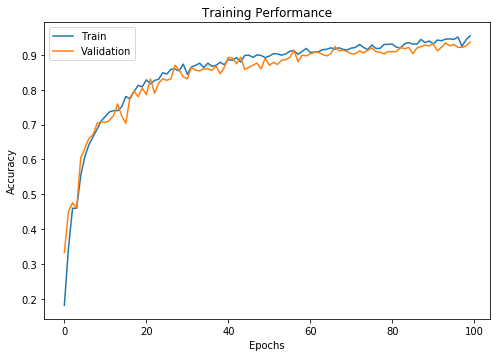

In [ ]:
plot_hist(history.history, xsize=8, ysize=12)

### Conclusion

We have an overfitting! Because the predicticting data is perfectly fit in the training . Another reason could be the meansquare errors small

# 9. Saving the model

### Save the model to the local disk




In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Save the model's weights to the local disk

In [ ]:
model.save_weights("model_weights.h5")

### Load the model back into memory

We first read in the JSON file then make use of *model_from_json* which we obtained as an import at the top of this script: *from keras.models import model_from_json*

In [ ]:
json_file = open('model.json', 'r')
loaded_model_as_json = json_file.read()
json_file.close()
restored_model = model_from_json(loaded_model_as_json)

## Load the weights back into memory

In [ ]:
restored_model.load_weights("model_weights.h5")

## Re-compile the model!

In [ ]:
restored_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Resume training, predict or perform other tasks


In [ ]:
restored_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=2, batch_size=8, verbose=1)

Train on 1131 samples, validate on 486 samples
Epoch 1/2
1131/1131 [==============================] - 1s 776us/step - loss: 0.0529 - acc: 0.9769 - val_loss: 0.0535 - val_acc: 0.9750
Epoch 2/2
1131/1131 [==============================] - 0s 195us/step - loss: 0.0529 - acc: 0.9779 - val_loss: 0.0477 - val_acc: 0.9788


In [ ]:
prediction_classes_val_restored = restored_model.predict_classes(X_val)


## Check the accuracy of the restored model

In [ ]:
accuracy_score(np.argmax(Y_val,1), prediction_classes_val_restored)

0.9259259259259259

## Notice



We notice that the accuracy of the restored model is approximatively the same as the accuracy of the model before saving.
